# 專題簡介與目標

哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，  
我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易實價登錄資料中先了解行情，  
我現在手邊蒐集了台北市 Taipei(A_lvr_land_A.csv)、新北市 New_Taipei(F_lvr_land_A.csv)、  
台中市 Taichung(B_lvr_land_A.csv)、高雄市 Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

1. 利用 Pandas 讀 csv 檔案，並將資料做串接  
   去除遺失值  
   欄位的資料型態觀察與更改  
   類別資料編碼  
   資料切片，擷取需要分析的資料  
   尋找異常值  
2. 利用相關係數可以分析數據之間的關係為高相關或低相關，正相關或負相關  
3. 利用 Pandas 中的 .plot() 即可做到簡易的資料視覺化  

### 1. 不動產資料檔案讀取並串接

讀取csv檔  
台北市: A_lvr_land_A.csv  
新北市: B_lvr_land_A.csv  
台中市: E_lvr_land_A.csv  
高雄市: F_lvr_land_A.csv

In [32]:
import pandas as pd

In [33]:
data_a = pd.read_csv('./real estate/A_lvr_land_A.csv')
data_b = pd.read_csv('./real estate/B_lvr_land_A.csv')
data_e = pd.read_csv('./real estate/E_lvr_land_A.csv')
data_f = pd.read_csv('./real estate/F_lvr_land_A.csv')

### 1-2. 刪除英文翻譯列

In [10]:
#從row=1開始讀取資料
data_a = data_a.iloc[1:]
data_b = data_b.iloc[1:]
data_e = data_e.iloc[1:]
data_f = data_f.iloc[1:]

In [34]:
#刪除row=0資料
data_a = data_a.drop([0])
data_b = data_b.drop([0])
data_e = data_e.drop([0])
data_f = data_f.drop([0])

### 1-3. 增加 city 欄位 和 給欄位值
台北市Taipei(A_lvr_land_A.csv)  
新北市New_Taipei(F_lvr_land_A.csv)  
台中市Taichung(B_lvr_land_A.csv)  
高雄市Kaohsiung(E_lvr_land_A.csv)  

In [38]:
#此寫法會新增在最後一欄
data_a['city'] = 'Taipei'
data_b['city'] = 'Taichung'
data_e['city'] = 'Kaohsiung'
data_f['city'] = 'New_Taipei'

In [35]:
#指定新增在第0欄
data_a.insert(0, 'City', 'Taipei')
data_b.insert(0, 'City', 'Taichung')
data_e.insert(0, 'City', 'Kaohsiung')
data_f.insert(0, 'City', 'New_Taipei')

### 1-4.合併四份資料

In [36]:
all_data = pd.concat([data_a,data_b,data_e,data_f], axis=0) #axis = 0直向合併
all_data

,City,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號
1,Taipei,南港區,土地,中南段一小段545-23地號,401.0,都市：其他:保護區。,NaN,NaN,1110303,土地2建物0車位0,...,NaN,0.0,0,協議價購；,RPOSMLLLKHHGFDA37EA,0.00,0.00,0.00,無,NaN
2,Taipei,士林區,土地,富安段三小段289-1地號,251.0,都市：其他:遊樂區(細部計畫尚未完成，尚未能准許依變更後計畫用途使用)。,NaN,NaN,1110301,土地1建物0車位0,...,NaN,0.0,0,NaN,RPRNMLSJLHHGFEA87EA,0.00,0.00,0.00,無,1.0
3,Taipei,士林區,土地,富安段三小段87-1地號,193.33,都市：其他:堤防用地(公共設施用地)(將來係採用區段徵收之方式辦理整體開發)。80/6/5,NaN,NaN,1110302,土地4建物0車位0,...,NaN,0.0,0,NaN,RPRNMLTJLHHGFEA97EA,0.00,0.00,0.00,無,NaN
4,Taipei,萬華區,土地,莒光段四小段59地號,0.11,都市：其他:特定專用區(一)。,NaN,NaN,1110301,土地1建物0車位0,...,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易；,RPWOMLSJLHHGFBA08DA,0.00,0.00,0.00,無,NaN
5,Taipei,士林區,土地,永新段四小段452地號,1.62,都市：其他:第三種住宅區。,NaN,NaN,1110207,土地3建物0車位0,...,NaN,0.0,0,包含公共設施保留地用地；,RPOOMLLKKHHGFEA96EA,0.00,0.00,0.00,無,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15573,New_Taipei,中和區,房地(土地+建物)+車位,新北市中和區建康路１７８號二十八樓,33.4,住,NaN,NaN,1030410,土地1建物1車位1,...,坡道平面,37.71,1760000,預售屋、或土地及建物分件登記案件；,RPVNMLRJLHHGFHF98EA,144.57,10.79,15.81,有,NaN
15574,New_Taipei,中和區,房地(土地+建物)+車位,新北市中和區建康路１８６號二十八樓,36.4,住,NaN,NaN,1030411,土地1建物1車位1,...,坡道平面,37.71,1710000,預售屋、或土地及建物分件登記案件；,RPWNMLRJLHHGFHF09EA,162.98,11.35,13.09,有,NaN
15575,New_Taipei,板橋區,房地(土地+建物)+車位,新北市板橋區華江一路２０２號四樓,5.87,商,NaN,NaN,1001228,土地1建物1車位1,...,坡道平面,23.97,0,車位編號:172號,RPUOMLPJJHHGFAF77DA,44.38,0.00,5.01,有,4988.0
15576,New_Taipei,板橋區,房地(土地+建物)+車位,新北市板橋區華江一路３９７號三樓,17.69,住,NaN,NaN,1001117,土地1建物1車位1,...,坡道平面,32.7,0,NaN,RPURMLNJJHHGFAF87DA,65.44,8.52,6.34,有,4989.0


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制  

交易年月日，限制在110年  
建物現況格局-房，1-5間  
建物現況格局-廳，1-2廳  

### 2-1. columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
  

a. columns_mapping: 將原中文欄位名稱，改為英文欄位名稱，以利後續分析  
b. analysis_columns: 需要分析的欄位  
c. columns_type: 欄位型態轉換  

In [37]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地位置建物門牌':'address',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['City','towns','main_use','building_state','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [38]:
#將原中文欄位名稱改為英文方便之後分析
analysis_data = all_data.rename(columns=columns_mapping)

In [203]:
#資料清理前，先查看資料
#analysis_data.to_excel('result.xlsx')

### 2-2. 取出主要用途(main_use)為'住家用' 以及都市土地使用分區(use_zoning)為'住'的資料，  
###        並針對以下欄位analysis_columns做分析並去除na值

In [39]:
analysis_data = analysis_data.loc[(analysis_data['main_use'].str.contains('住'))&(analysis_data['use_zoning'].str.contains('住'))&(analysis_data['note']!='親友%'),analysis_columns].dropna()

### 2-3. column type轉換

In [40]:
analysis_data.info()
analysis_data = analysis_data.astype(columns_type)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25899 entries, 7 to 15576
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        25899 non-null  object 
 1   towns                       25899 non-null  object 
 2   main_use                    25899 non-null  object 
 3   building_state              25899 non-null  object 
 4   use_zoning                  25899 non-null  object 
 5   total_price                 25899 non-null  object 
 6   building_area_square_meter  25899 non-null  object 
 7   main_building_area          25899 non-null  float64
 8   tx_dt                       25899 non-null  object 
 9   unit_price                  25899 non-null  object 
 10  room_number                 25899 non-null  object 
 11  hall_number                 25899 non-null  object 
 12  health_number               25899 non-null  object 
dtypes: float64(1), object(12)
memor

### 2-4. 資料切片  
         a. 指定只看107年資料(tx_dt): 新增欄位(tx_dt_year)
         b. 建物現況格局-房(room_number)，限制在1到5間
         c. 建物現況格局-廳(hall_number)，限制在1到2廳
         d. 最後運用.reset_index()重新定義索引

In [41]:
#a. 指定只看107年以後資料(tx_dt): 新增欄位(tx_dt_year)
analysis_data['tx_dt_year'] = analysis_data['tx_dt'].apply(lambda x: int(x[:-4]))

In [42]:
#b. 建物現況格局-房(room_number)，限制在1到5間
#c. 建物現況格局-廳(hall_number)，限制在1到2廳
#d. 重新定義索引
analysis_data = analysis_data.loc[(analysis_data.tx_dt_year>=107)&
                                  (analysis_data.room_number>=1)&
                                  (analysis_data.room_number<=5)&
                                  (analysis_data.hall_number>=1)&
                                  (analysis_data.hall_number<=2)]
analysis_data = analysis_data.reset_index(drop=True)

In [43]:
analysis_data.to_excel('analysis_data.xlsx')

# 3. 建立自定義特徵加入分析

3-1. 定義新特徵 : 1平方公尺相當於0.3025坪  
  
建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025  
主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025  
單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025  

In [44]:
analysis_data['building_area_square_feet'] = analysis_data.building_area_square_meter*0.3025
analysis_data['main_building_area_square_feet'] = analysis_data.main_building_area*0.3025
analysis_data['unit_price_square_feet'] = analysis_data.unit_price/0.3025

3-2. 觀察資料

In [45]:
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,2.263400e+04,22634.000000,22634.000000,2.263400e+04,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,2.263400e+04
mean,1.372834e+07,138.666648,84.198650,1.042577e+05,2.860740,1.827074,1.856897,109.805470,41.946661,25.470092,3.446535e+05
std,1.107267e+07,63.397566,44.107177,6.350069e+04,0.896023,0.378191,0.899528,0.913346,19.177764,13.342421,2.099196e+05
min,1.000000e+04,1.320000,0.000000,1.510000e+02,1.000000,1.000000,0.000000,107.000000,0.399300,0.000000,4.991736e+02
25%,7.700000e+06,96.462500,57.030000,6.695075e+04,2.000000,2.000000,1.000000,110.000000,29.179906,17.251575,2.213248e+05
50%,1.120000e+07,128.265000,75.870000,8.859500e+04,3.000000,2.000000,2.000000,110.000000,38.800162,22.950675,2.928760e+05
75%,1.616000e+07,166.450000,95.607500,1.285498e+05,3.000000,2.000000,2.000000,110.000000,50.351125,28.921269,4.249579e+05
max,2.667800e+08,695.040000,639.610000,4.290970e+06,5.000000,2.000000,52.000000,111.000000,210.249600,193.482025,1.418502e+07


發現 main_building_area min是零  
main_building_area_square_feet min是零  
需將其拿掉

In [47]:
analysis_data = analysis_data.loc[(analysis_data.main_building_area>0)&(analysis_data.main_building_area_square_feet>0)]

In [48]:
#拿掉後再觀察資料
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,2.261000e+04,22610.000000,22610.000000,2.261000e+04,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,2.261000e+04
mean,1.372847e+07,138.647946,84.288025,1.042626e+05,2.859487,1.826935,1.855108,109.805175,41.941004,25.497127,3.446699e+05
std,1.107533e+07,63.379094,44.045143,6.348286e+04,0.894956,0.378312,0.896998,0.913742,19.172176,13.323656,2.098607e+05
min,1.000000e+04,2.990000,2.990000,1.510000e+02,1.000000,1.000000,0.000000,107.000000,0.904475,0.904475,4.991736e+02
25%,7.700000e+06,96.445000,57.165000,6.699500e+04,2.000000,2.000000,1.000000,110.000000,29.174612,17.292412,2.214711e+05
50%,1.120000e+07,128.240000,75.930000,8.863550e+04,3.000000,2.000000,2.000000,110.000000,38.792600,22.968825,2.930099e+05
75%,1.616000e+07,166.420000,95.620000,1.285498e+05,3.000000,2.000000,2.000000,110.000000,50.342050,28.925050,4.249579e+05
max,2.667800e+08,695.040000,639.610000,4.290970e+06,5.000000,2.000000,52.000000,111.000000,210.249600,193.482025,1.418502e+07


In [49]:
analysis_data.to_excel('analysis_data.xlsx')

# 4. 視覺化_房價走勢

4-1. 台北市、新北市、台中市和高雄市從107年到目前的房價平均數走勢  
     結論: 房價皆下修

<AxesSubplot:title={'center':'Living Place Price History'}, xlabel='year', ylabel='feet price(TWD)'>

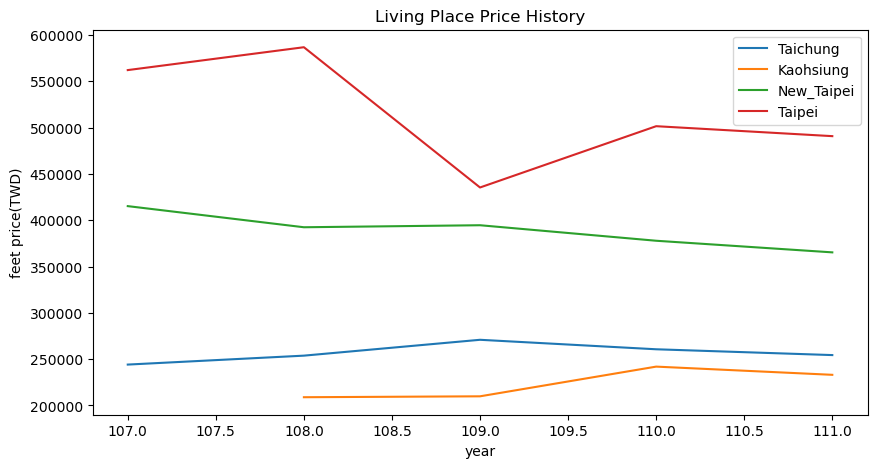

In [54]:
prices = {}
for district in set(analysis_data['City']):
    cond = (
        (analysis_data['City'] == district)
        & (analysis_data['unit_price_square_feet'] < analysis_data["unit_price_square_feet"].quantile(0.95))
        & (analysis_data['unit_price_square_feet'] > analysis_data["unit_price_square_feet"].quantile(0.05))
        )
    
    groups = analysis_data[cond]['tx_dt_year']
    
    prices[district] = analysis_data[cond]['unit_price_square_feet'].astype(float).groupby(groups).mean()
    
price_history = pd.DataFrame(prices)
price_history.plot(title='Living Place Price History',
                    xlabel='year',
                    ylabel='feet price(TWD)',
                    legend=True,                    
                    figsize=(10, 5))

4-2. 高雄市從109年到目前的建物型態房價走勢  
     結論:公寓(5樓以下無電梯)的房價大幅下修，華廈(10樓以下有電梯)房價往上升 

In [55]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

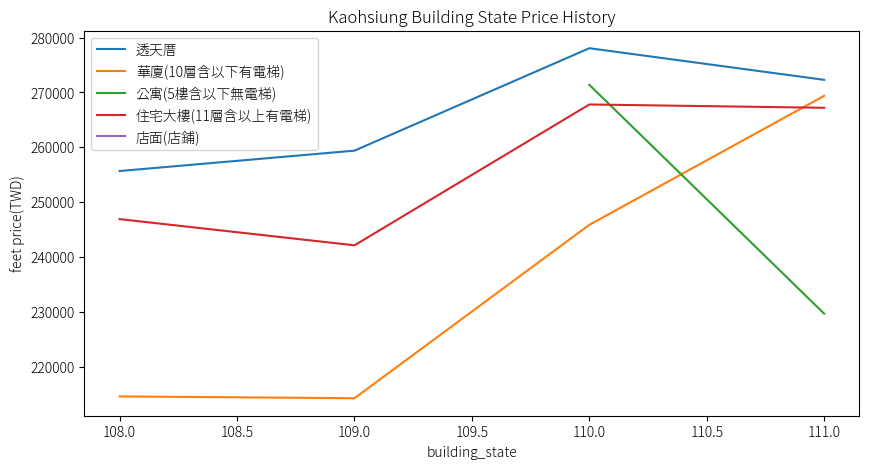

In [58]:
building_type_prices = {}
for building_type in set(analysis_data['building_state']):
    cond = (
            (analysis_data["City"]=='Kaohsiung')
           &(analysis_data['unit_price_square_feet'] < analysis_data["unit_price_square_feet"].quantile(0.8))
           & (analysis_data['unit_price_square_feet'] > analysis_data["unit_price_square_feet"].quantile(0.2))
           & (analysis_data['building_state'] == building_type)
     )
    groups = analysis_data[cond]['tx_dt_year']
    
    building_type_prices[building_type] = analysis_data[cond]['unit_price_square_feet'].astype(float).groupby(groups).mean()

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] #中文亂碼
    
building_type_prices = pd.DataFrame(building_type_prices)

building_type_prices.plot(title='Kaohsiung Building State Price History',
                    xlabel='building_state',
                    ylabel='feet price(TWD)',
                    legend=True,                    
                    figsize=(10, 5))

#plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x))) #x軸整數

# 顯示圖表
plt.show()

將高雄-前金區的房價單獨拿出來看，並且按照建案型態製作分佈圖

Text(0, 0.5, '數量(20戶)')

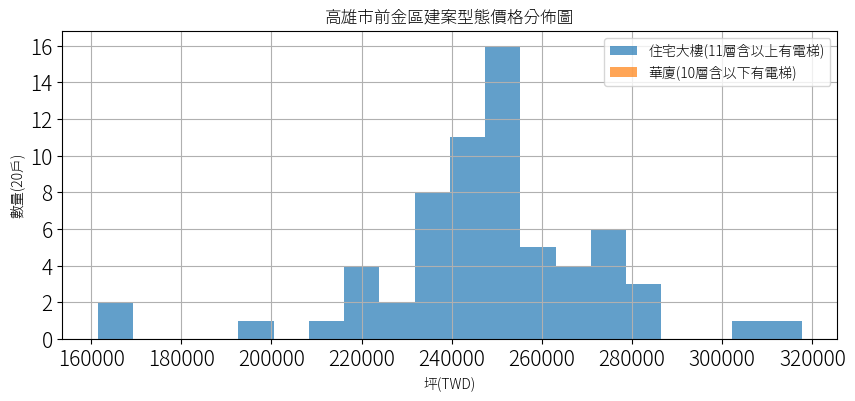

In [70]:
dfdistrict = analysis_data[
    (analysis_data['City'] == 'Kaohsiung') 
    & (analysis_data['towns'] == '前金區') 
    & (analysis_data['tx_dt_year'] == 110)     
    & (
    (analysis_data['building_state'] == '住宅大樓(11層含以上有電梯)') 
        | (analysis_data['building_state'] == '華廈(10層含以下有電梯)') 
        #| (analysis_data['building_state'] == '公寓(5樓含以下無電梯)')
)]

dfdistrict_filter = dfdistrict[dfdistrict['unit_price_square_feet'] < 350000]
dfdistrict = dfdistrict_filter['unit_price_square_feet'].groupby(dfdistrict['building_state'])
dfdistrict.plot(kind='hist',
        alpha=0.7,
        bins=20,
        title='高雄市前金區建案型態價格分佈圖',
        grid=True,
        figsize=(10,4),
        fontsize=15,
        legend=True)
plt.xlabel('坪(TWD)')
plt.ylabel("數量(20戶)")